### Install Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Load
- colab > drive mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/competition_data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/competition_data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/competition_data/sample_submission.csv')

In [4]:
train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [5]:
train.info()

# 70개의 feature
# target값인 nerdiness은 int형이고 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

In [6]:
# country만 object형이고, 나머지는 모두 수치형 데이터  => 연관이 없다고 판단하여 drop
train = train.drop(['country'], axis=1)
test = test.drop(['country'], axis=1)

### 이상치 및 결측치 처리

In [7]:
train.describe()


,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
count,15000.000000,14959.000000,14931.000000,14950.000000,14929.000000,14962.000000,14952.000000,14924.000000,14952.000000,14944.000000,...,14953.000000,15000.000000,14953.000000,14755.000000,14601.000000,14915.000000,14918.000000,14681.000000,14911.000000,15000.000000
mean,7499.500000,3.972859,4.065702,4.222809,3.795499,3.856503,3.676364,4.183262,3.879013,3.915418,...,1.346018,26.740867,1.185113,4.098340,1.847956,1.633121,1.179917,2.744091,1.938703,0.553533
std,4330.271354,1.095914,1.169681,1.023335,1.219940,1.195622,1.170986,1.059756,1.302081,1.117625,...,0.475715,317.058436,0.481993,3.425699,1.223191,0.481969,0.465985,24.109344,0.239882,0.497142
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3749.750000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,1.000000,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000
50%,7499.500000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,1.000000,20.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,11249.250000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,27.000000,1.000000,6.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000
max,14999.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,38822.000000,3.000000,12.000000,5.000000,2.000000,3.000000,2919.000000,2.000000,1.000000


In [8]:
# age, familysize 이상치 제거

for i in range(1, 15000):
    if train['familysize'][i] >= 10.0:
        train['familysize'][i] = None

for i in range(1, 15000):
    if train['age'][i] >= 80.0:
        train['age'][i] = None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


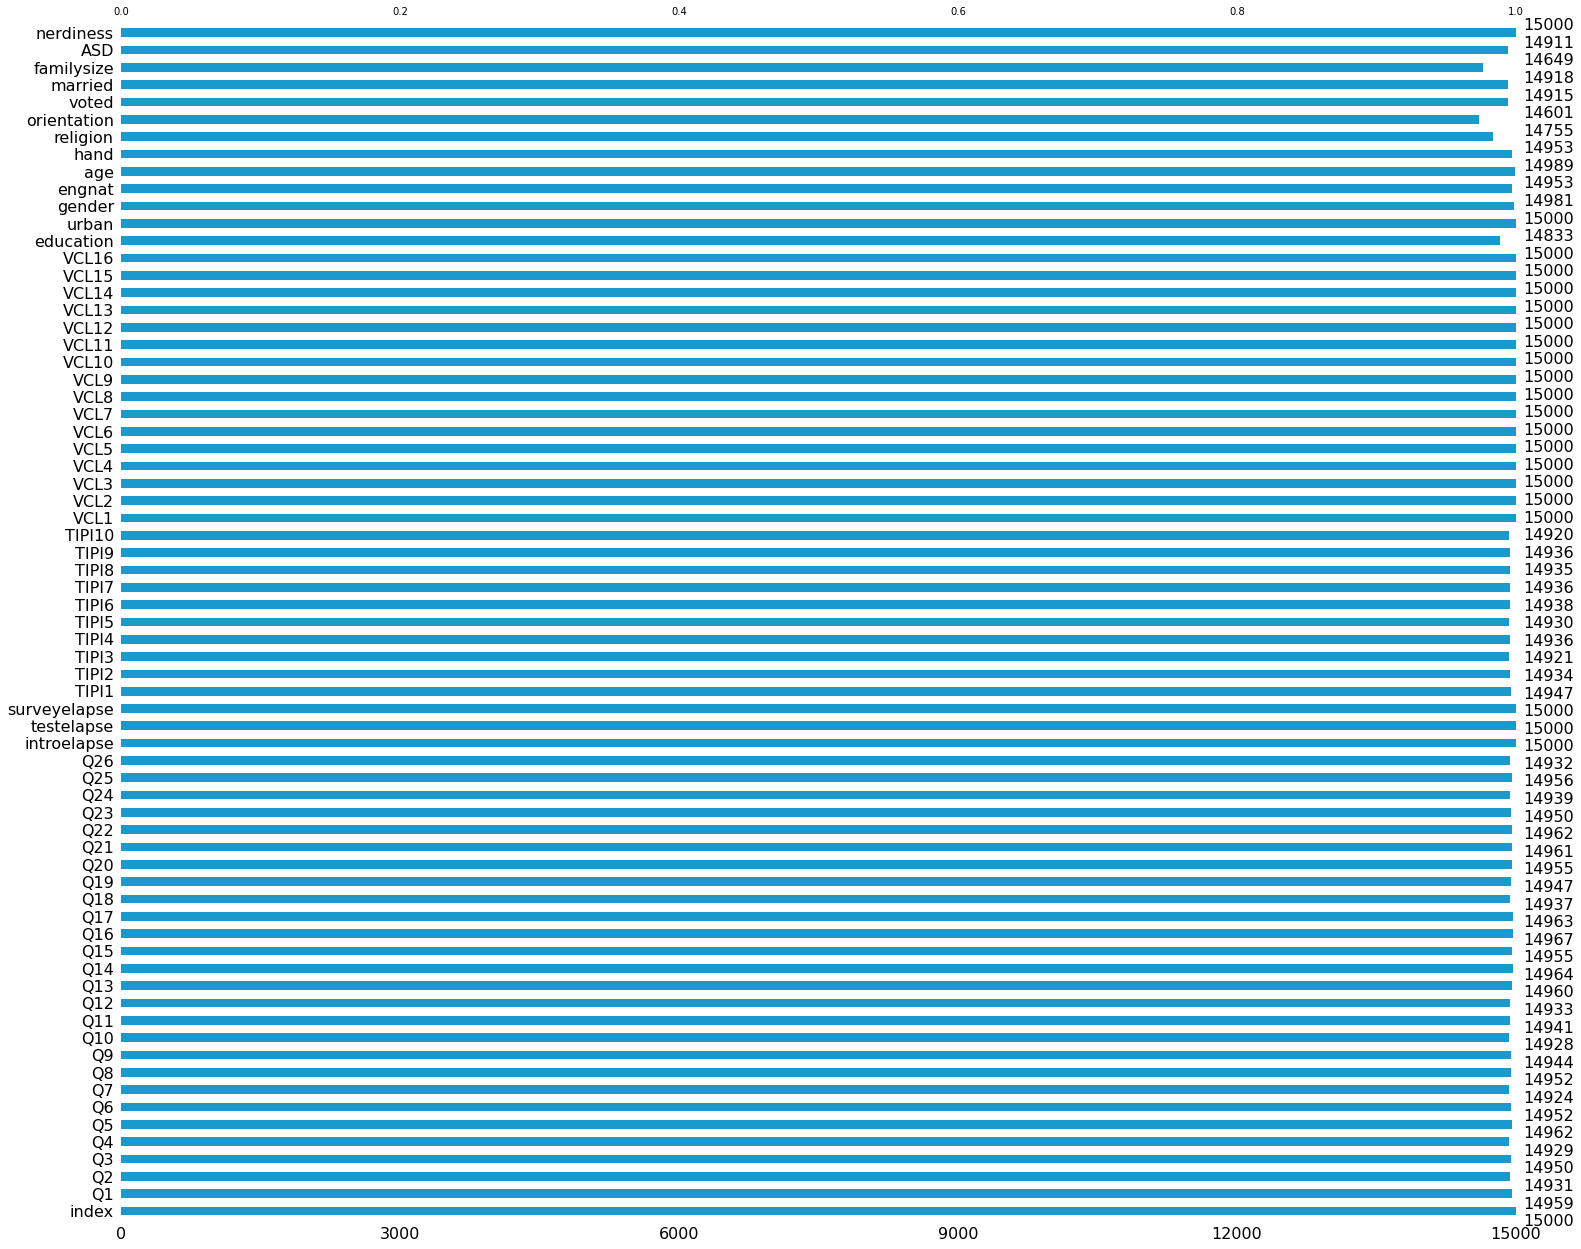

In [9]:
# missingno 라이브러리를 이용하여 결측치 시각화
import missingno as msno
msno.bar(train, color=(0.1, 0.6, 0.8))


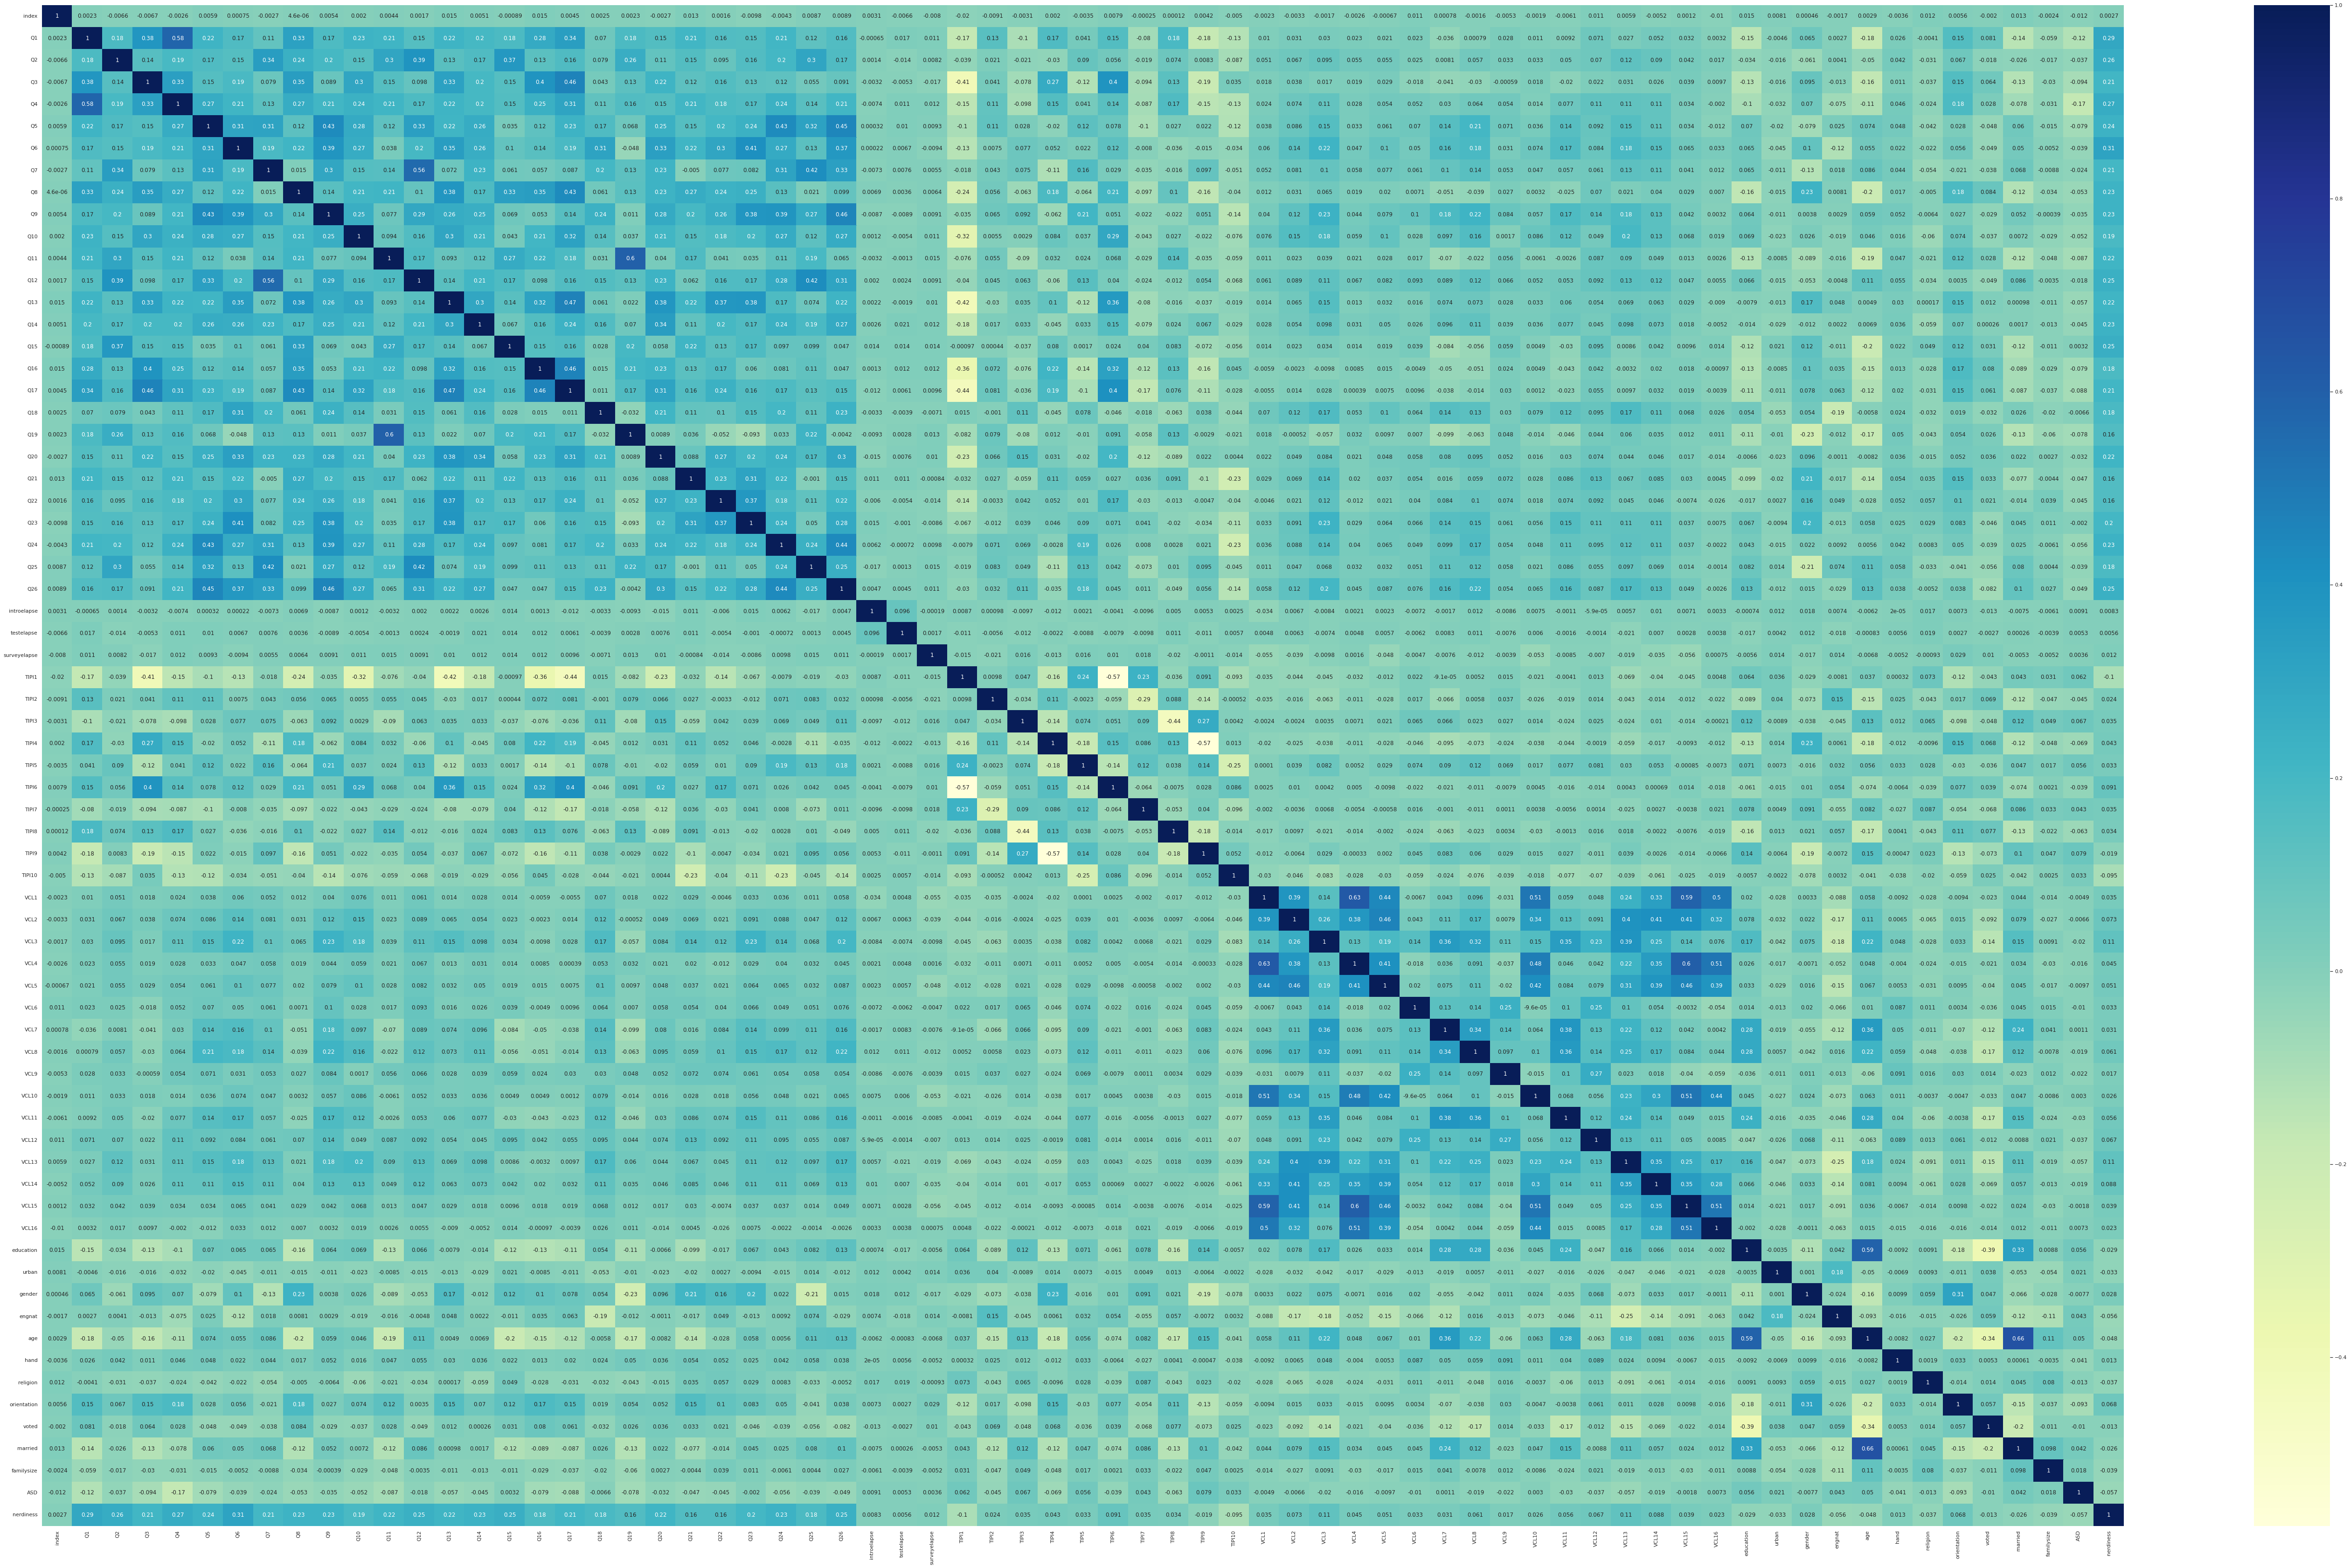

In [10]:
# 상관관계(correlation) 시각화(히트맵)
sns.set(rc={'figure.figsize': (100, 60)})
sns.heatmap(train.corr(), annot=True, fmt='.2g', cmap='YlGnBu')


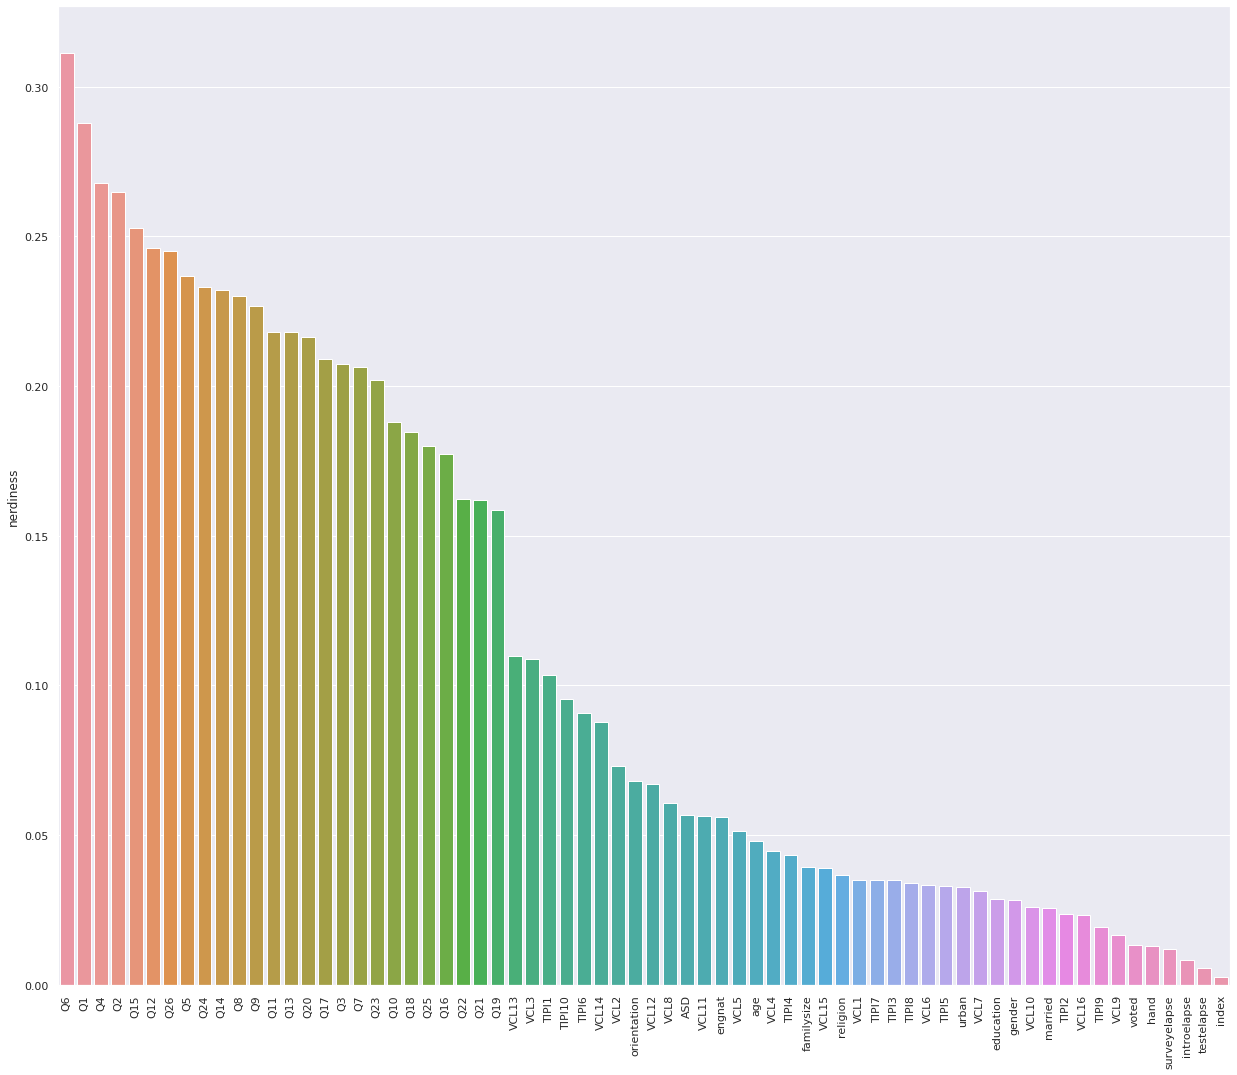

In [11]:
#  히트맵이 잘 안보여서 그래프 시각화
plt.figure(figsize=(21, 18))  # 사이즈 변경
plt.xticks(rotation=90)  # x축 text 회전
sns.barplot(x=abs(train.corr()["nerdiness"]).sort_values(ascending=False)[1:].index, y=abs(train.corr()["nerdiness"]).sort_values(ascending=False)[1:])


#### 필요없다고 판단되는 column 제거

In [12]:
train_data = train.drop(['index', 'testelapse', 'introelapse', 'surveyelapse'], axis=1)
test = test.drop(['index', 'testelapse', 'introelapse', 'surveyelapse'], axis=1)


#### 결측값 처리
- 이상치 제거했으므로 KNN Imputer 사용하기
- test set은 따로 처리 안함 

In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)

clear_train = imputer.fit_transform(train_data)
train_df = pd.DataFrame(clear_train)
train_df.columns = train_data.columns


In [14]:
# 61개 column left
train_df


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1.0,20.0,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1.0
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49.0,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1.0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,43.0,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1.0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,17.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,18.0,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17.0,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0.0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45.0,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29.0,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0.0


In [15]:
# null값 제거확인
print(train.isnull().sum())
print('-'*40)
train_df.isnull().sum()

index           0
Q1             41
Q2             69
Q3             50
Q4             71
             ... 
voted          85
married        82
familysize    351
ASD            89
nerdiness       0
Length: 69, dtype: int64
----------------------------------------


Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
             ..
voted         0
married       0
familysize    0
ASD           0
nerdiness     0
Length: 65, dtype: int64

### auto-ML 모델링

In [ ]:
!pip install -U --pre pycaret

In [ ]:
# !pip install markupsafe==2.0.1
!pip install catboost
!pip install xgboost==1.1.0

In [18]:
from pycaret.classification import *

'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.


In [19]:
clf = setup(data=train_df, target='nerdiness', train_size= 0.8, fold=10, fix_imbalance=True)

INFO:logs:PyCaret ClassificationExperiment
INFO:logs:Logging name: clf-default-name
INFO:logs:ML Usecase: MLUsecase.CLASSIFICATION
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: 4cec
INFO:logs:self.variable_keys: {'_all_models_internal', 'X_test', 'fix_imbalance', 'fold_groups_param', '_all_models', 'variable_keys', 'log_plots_param', 'exp_id', 'fold_shuffle_param', 'y', 'gpu_param', 'fold_generator', '_is_multiclass', 'idx', '_ml_usecase', 'logging_param', '_all_metrics', 'target_param', 'pipeline', 'html_param', 'USI', 'seed', 'exp_name_log', 'y_train', 'y_test', 'data', 'X_train', 'master_model_container', '_gpu_n_jobs_param', '_available_plots', 'n_jobs_param', 'memory', 'display_container', 'X'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.13
INFO:logs:python_build: ('default', 'Apr 24 2022 01:04:09')
INFO:logs:machine: x86_64
INFO:logs:platform: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
INFO:logs:Memory: svmem(total=27332632576

,Description,Value
0,Session id,7672
1,Target,nerdiness
2,Target type,Binary
3,Original data shape,"(15000, 65)"
4,Transformed data shape,"(16284, 65)"
5,Transformed train set shape,"(13284, 65)"
6,Transformed test set shape,"(3000, 65)"
7,Numeric features,64
8,Preprocess,True
9,Imputation type,simple


INFO:logs:Soft dependency imported: xgboost: 1.1.0
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: xgboost: 1.1.0
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:setup() successfully completed in 3.9s...............


In [20]:
best_5 = compare_models(sort='AUC', n_select=5)

INFO:logs:Initializing compare_models()
INFO:logs:compare_models(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f556fa4b8d0>, include=None, fold=None, round=4, cross_validation=True, sort=AUC, n_select=5, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, parallel=None, caller_params={'self': <pycaret.classification.oop.ClassificationExperiment object at 0x7f556fa4b8d0>, 'include': None, 'exclude': None, 'fold': None, 'round': 4, 'cross_validation': True, 'sort': 'AUC', 'n_select': 5, 'budget_time': None, 'turbo': True, 'errors': 'ignore', 'fit_kwargs': None, 'groups': None, 'experiment_custom_tags': None, 'probability_threshold': None, 'engines': None, 'verbose': True, 'parallel': None, '__class__': <class 'pycaret.classification.oop.ClassificationExperiment'>}, exclude=None)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7788,0.8686,0.8166,0.7910,0.8035,0.5507,0.5512,0.8960
rf,Random Forest Classifier,0.7799,0.8640,0.8214,0.7897,0.8052,0.5525,0.5533,0.9370
catboost,CatBoost Classifier,0.7590,0.8334,0.8080,0.7687,0.7878,0.5094,0.5104,14.4670
xgboost,Extreme Gradient Boosting,0.7613,0.8330,0.8034,0.7743,0.7885,0.5149,0.5155,1.7460
lightgbm,Light Gradient Boosting Machine,0.7453,0.8194,0.8014,0.7543,0.7770,0.4808,0.4822,0.5030
gbc,Gradient Boosting Classifier,0.7328,0.8052,0.7788,0.7487,0.7633,0.4566,0.4573,1.7890
lr,Logistic Regression,0.7228,0.7956,0.7364,0.7567,0.7462,0.4410,0.4414,1.5200
lda,Linear Discriminant Analysis,0.7240,0.7952,0.7460,0.7532,0.7495,0.4422,0.4424,0.1340
ada,Ada Boost Classifier,0.7240,0.7930,0.7541,0.7492,0.7515,0.4411,0.4413,0.4670
nb,Naive Bayes,0.6882,0.7485,0.7306,0.7132,0.7217,0.3672,0.3675,0.0630


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

INFO:logs:Initializing Logistic Regression
INFO:logs:Total runtime is 4.083315531412761e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f556fa4b8d0>, estimator=lr, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=True, metrics=None, display=<pycaret.internal.display.display.CommonDisplay object at 0x7f554f19fc90>, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Logistic Regression Imported successfully


INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=7672, verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
          

#### Create ET, RF Model 

In [21]:
# best_5 model : et, rf, catboost, xgboost, lightgbm

et = create_model('et') # Mean AUC : 0.8686

INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f556fa4b8d0>, estimator=et, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, metrics=None, display=None, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7642,0.8583,0.8195,0.7698,0.7939,0.5190,0.5203
1,0.7558,0.8559,0.8090,0.7642,0.7860,0.5023,0.5034
2,0.7758,0.8590,0.8163,0.7866,0.8012,0.5445,0.5449
3,0.7892,0.8748,0.8102,0.8090,0.8096,0.5734,0.5734
4,0.8017,0.8896,0.8208,0.8208,0.8208,0.5988,0.5988
5,0.7692,0.8618,0.8087,0.7817,0.7950,0.5311,0.5315
6,0.7833,0.8745,0.8268,0.7911,0.8085,0.5593,0.5600
7,0.7808,0.8669,0.8253,0.7885,0.8065,0.5541,0.5549
8,0.7917,0.8795,0.8178,0.8080,0.8129,0.5779,0.5780


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Extra Trees Classifier Imported successfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=7672, verbose=0, warm_start=False)
INFO:logs:create_model() successfully completed......................................


In [22]:
rf = create_model('rf') # Mean AUC : 0.8640

INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f556fa4b8d0>, estimator=rf, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, metrics=None, display=None, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7658,0.8471,0.8331,0.7652,0.7977,0.5209,0.5236
1,0.7658,0.8519,0.8195,0.7720,0.7950,0.5225,0.5238
2,0.7733,0.8588,0.8193,0.7816,0.8000,0.5388,0.5396
3,0.7808,0.8704,0.8072,0.7988,0.8030,0.5561,0.5561
4,0.8058,0.8814,0.8343,0.8183,0.8262,0.6063,0.6064
5,0.7725,0.8567,0.8072,0.7871,0.7970,0.5384,0.5386
6,0.7958,0.8744,0.8449,0.7980,0.8208,0.5841,0.5853
7,0.7825,0.8638,0.8343,0.7858,0.8093,0.5567,0.5581
8,0.7842,0.8727,0.8117,0.8009,0.8063,0.5627,0.5627


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Random Forest Classifier Imported successfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 18
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=7672, verbose=0, warm_start=False)
INFO:logs:create_model() successfully completed......................................


In [ ]:
# tuned_et = tune_model(et)
# tuned_rf = tune_model(rf)

In [23]:
bagged_et = ensemble_model(et) # Mean AUC : 0.8676 

INFO:logs:Initializing ensemble_model()
INFO:logs:ensemble_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f556fa4b8d0>, estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=7672, verbose=0, warm_start=False), method=Bagging, fold=None, n_estimators=10, round=4, choose_better=False, optimize=Accuracy, fit_kwargs=None, groups=None, probability_threshold=None, verbose=True, return_train_score=False)
INFO:logs:Checking exceptions


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7617,0.8545,0.8120,0.7703,0.7906,0.5145,0.5154
1,0.7600,0.8589,0.8135,0.7674,0.7898,0.5107,0.5119
2,0.7817,0.8609,0.8298,0.7871,0.8079,0.5554,0.5565
3,0.7825,0.8732,0.8072,0.8012,0.8042,0.5596,0.5596
4,0.7925,0.8853,0.8253,0.8047,0.8149,0.5789,0.5792
5,0.7800,0.8606,0.8238,0.7882,0.8056,0.5525,0.5532
6,0.7858,0.8750,0.8313,0.7920,0.8112,0.5642,0.5650
7,0.7825,0.8633,0.8404,0.7826,0.8105,0.5561,0.5580
8,0.7900,0.8766,0.8208,0.8038,0.8122,0.5741,0.5743


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Extra Trees Classifier
INFO:logs:Importing untrained ensembler
INFO:logs:Ensemble method set to Bagging
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f556fa4b8d0>, estimator=BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                      ccp_alpha=0.0,
                                                      class_weight=None,
                                                      criterion='gini',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                       

INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 19
INFO:logs:display_container: 5
INFO:logs:BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                      ccp_alpha=0.0,
                                                      class_weight=None,
                                                      criterion='gini',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                           

In [24]:
boosted_et = ensemble_model(et, method='Boosting') # Mean AUC : 0.8687

INFO:logs:Initializing ensemble_model()
INFO:logs:ensemble_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f556fa4b8d0>, estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=7672, verbose=0, warm_start=False), method=Boosting, fold=None, n_estimators=10, round=4, choose_better=False, optimize=Accuracy, fit_kwargs=None, groups=None, probability_threshold=None, verbose=True, return_train_score=False)
INFO:logs:Checking exceptions


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7517,0.8540,0.8045,0.7610,0.7822,0.4939,0.4950
1,0.7617,0.8582,0.8165,0.7680,0.7915,0.5139,0.5153
2,0.7808,0.8596,0.8193,0.7918,0.8053,0.5548,0.5552
3,0.7908,0.8767,0.8102,0.8115,0.8109,0.5769,0.5769
4,0.7925,0.8837,0.8253,0.8047,0.8149,0.5789,0.5792
5,0.7792,0.8647,0.8148,0.7921,0.8033,0.5517,0.5520
6,0.7892,0.8786,0.8268,0.7991,0.8127,0.5717,0.5721
7,0.7758,0.8619,0.8268,0.7809,0.8032,0.5433,0.5445
8,0.7992,0.8770,0.8238,0.8152,0.8195,0.5932,0.5932


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Extra Trees Classifier
INFO:logs:Importing untrained ensembler
INFO:logs:Ensemble method set to Boosting
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f556fa4b8d0>, estimator=AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nod

INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 20
INFO:logs:display_container: 6
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_samples_leaf=1,
                                                    

In [25]:
boosted_rf = ensemble_model(rf, method = 'Boosting')  # Mean AUC : 0.8630

INFO:logs:Initializing ensemble_model()
INFO:logs:ensemble_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f556fa4b8d0>, estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=7672, verbose=0, warm_start=False), method=Boosting, fold=None, n_estimators=10, round=4, choose_better=False, optimize=Accuracy, fit_kwargs=None, groups=None, probability_threshold=None, verbose=True, return_train_score=False)
INFO:logs:Checking exceptions


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7600,0.8474,0.8211,0.7636,0.7913,0.5098,0.5117
1,0.7650,0.8567,0.8211,0.7701,0.7948,0.5206,0.5220
2,0.7783,0.8555,0.8163,0.7901,0.8030,0.5498,0.5502
3,0.7858,0.8685,0.8163,0.8006,0.8084,0.5657,0.5659
4,0.7942,0.8753,0.8238,0.8080,0.8158,0.5826,0.5828
5,0.7667,0.8553,0.8072,0.7791,0.7929,0.5259,0.5264
6,0.7875,0.8691,0.8328,0.7934,0.8126,0.5675,0.5684
7,0.7892,0.8644,0.8358,0.7940,0.8144,0.5708,0.5718
8,0.7950,0.8729,0.8268,0.8074,0.8170,0.5841,0.5843


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Random Forest Classifier
INFO:logs:Importing untrained ensembler
INFO:logs:Ensemble method set to Boosting
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f556fa4b8d0>, estimator=AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                      

INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 21
INFO:logs:display_container: 7
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                 

### Blend Model
- boosted_et
- bagged_et
- boosted_rf
-> soft votiing ensemble

In [26]:
blended = blend_models(estimator_list=[boosted_et, bagged_et, boosted_rf], method='soft')   # Mean AUC : 0.8708

INFO:logs:Initializing blend_models()
INFO:logs:blend_models(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f556fa4b8d0>, estimator_list=[AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_samples_leaf=1,
                                                       m

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7625,0.8564,0.8165,0.7691,0.7921,0.5157,0.5170
1,0.7625,0.8622,0.8211,0.7669,0.7930,0.5152,0.5169
2,0.7808,0.8633,0.8283,0.7868,0.8070,0.5538,0.5548
3,0.7917,0.8771,0.8148,0.8099,0.8123,0.5782,0.5782
4,0.7983,0.8864,0.8328,0.8085,0.8205,0.5906,0.5909
5,0.7775,0.8644,0.8163,0.7889,0.8024,0.5480,0.5484
6,0.7917,0.8789,0.8434,0.7932,0.8175,0.5753,0.5768
7,0.7900,0.8677,0.8449,0.7901,0.8166,0.5716,0.5734
8,0.7950,0.8793,0.8238,0.8092,0.8164,0.5844,0.5845


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Getting model names
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f556fa4b8d0>, estimator=VotingClassifier(estimators=[('Extra Trees Classifier',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                                                     ccp_alpha=0.0,
                                                                                     class_weight=None,
                                                                                     criterion='gini',
                                                                                     max_depth=None,
                                   

INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 22
INFO:logs:display_container: 8
INFO:logs:VotingClassifier(estimators=[('Extra Trees Classifier',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                                                     ccp_alpha=0.0,
                                                                                     class_weight=None,
                                                                                     criterion='gini',
                                                                                     max_depth=None,
                                                                                     max_features='auto',
                                                                                     max_lea

### 모델 예측 

In [28]:
blend_prediction = predict_model(blended, data=test)
# stack_prediction = predict_model(stacker, data=test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f556fa4b8d0>, estimator=VotingClassifier(estimators=[('Extra Trees Classifier',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                                                     ccp_alpha=0.0,
                                                                                     class_weight=None,
                                                                                     criterion='gini',
                                                                                     max_depth=None,
                                                                                     max_features='auto',
                                                                                     max_leaf_nodes=

INFO:logs:Set up data.


### 평가 방법을 잘못알고 Prediction을 수행해 결과가 좋지 않았다고 생각합니다!

In [29]:
submission['nerdiness'] = blend_prediction['Label']   
submission.to_csv("819.csv", index=False)   
print(submission)

       index  nerdiness
0          0          0
1          1          1
2          2          1
3          3          1
4          4          1
...      ...        ...
35447  35447          1
35448  35448          1
35449  35449          1
35450  35450          0
35451  35451          1

[35452 rows x 2 columns]


In [34]:
blend_prediction

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,age,hand,religion,orientation,voted,married,familysize,ASD,Label,Score
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,19.0,1.0,4.000000,4.0,1.0,1.0,3.000000,2.0,0,0.8047
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,33.0,1.0,1.000000,5.0,2.0,1.0,5.000000,2.0,1,0.7990
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,13.0,1.0,4.000000,5.0,2.0,1.0,3.000000,2.0,1,0.8380
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,28.0,1.0,2.000000,2.0,2.0,1.0,3.000000,2.0,1,0.5673
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,15.0,1.0,4.000000,5.0,2.0,1.0,2.000000,2.0,1,0.9087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,...,16.0,3.0,10.000000,4.0,2.0,1.0,3.000000,2.0,1,0.9083
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,...,16.0,3.0,2.000000,5.0,2.0,1.0,2.000000,2.0,1,0.6987
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,31.0,1.0,1.000000,5.0,1.0,1.0,2.000000,2.0,1,0.9070
35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,...,19.0,1.0,12.000000,1.0,2.0,1.0,2.522833,2.0,0,0.7987


### 뒤늦게 끄적여보는 코드 

In [33]:
sub_pred = blend_prediction[['Label', 'Score']]
print(sub_pred)

       Label   Score
0          0  0.8047
1          1  0.7990
2          1  0.8380
3          1  0.5673
4          1  0.9087
...      ...     ...
35447      1  0.9083
35448      1  0.6987
35449      1  0.9070
35450      0  0.7987
35451      1  0.6633

[35452 rows x 2 columns]


In [39]:
for i in range(len(sub_pred)):
    if sub_pred['Label'][i] == 0:
        sub_pred['Score'][i] = 1 - sub_pred['Score'][i]
        

submission['nerdiness'] = sub_pred['Score']
submission

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until



,index,nerdiness
0,0,0.1953
1,1,0.7990
2,2,0.8380
3,3,0.5673
4,4,0.9087
...,...,...
35447,35447,0.9083
35448,35448,0.6987
35449,35449,0.9070
35450,35450,0.2013
